<a href="https://colab.research.google.com/github/primonmari/DecisionTreeRegressor/blob/main/Decision_TreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #Fatores de risco para doenças cardiovasculares

#1° Problema de Negócio
 
Analisar o efeito do estilo de vida e fatores ambientais sobre o risco de doença cardiovascular.Prevendo os riscos de diferentes faixas etárias com base em suas características demográficas, como sexo, altura, peso e tabagismo.Detectando padrões entre os níveis de atividade física, pressão arterial e níveis de colesterol com probabilidade de desenvolver doenças cardiovasculares entre os indivíduos.

O conjunto de dados fornece um excelente recurso para os pesquisadores aplicarem técnicas modernas de aprendizado de máquina para explorar as possíveis relações entre fatores de risco e doenças cardiovasculares que podem levar a uma melhor compreensão desse grave problema de saúde e projetar melhores medidas preventivas.


.

Fonte dos Dados:

Usaremos a base de dados "heart_data.csv" originada por meio dos dados fornecidos para o Kangle.

.
Base de dados: https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas

Download:
https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas/download?datasetVersionNumber=2

.

Arquitetura dos Dados (AD):


idade:	Idade do indivíduo. (Inteiro)

gênero:	Gênero do indivíduo. (Corda)

altura:	Altura do indivíduo em centímetros. (Inteiro)

peso:	Peso do indivíduo em quilogramas. (Inteiro)

ap_hi:	Leitura da pressão arterial sistólica. (Inteiro)

ap_lo:	Leitura da pressão arterial diastólica. (Inteiro)

colesterol:	Nível de colesterol do indivíduo. (Inteiro)

gluc:	Nível de glicose do indivíduo. (Inteiro)

fumaça:	Status de fumante do indivíduo. (Boleano)

álcool:	Estado de consumo de álcool do indivíduo. (Boleano)

ativo:	Nível de atividade física do indivíduo. (Boleano)

cardio:	Presença ou ausência de doença cardiovascular. (Boleano)





Nota: Nível de colesterol total lido como mg/dl em uma escala de 0 a 5+ unidades (inteiro). Cada unidade denota aumento/diminuição de 20 mg/dL, respectivamente.
‐ Gluc : Nível de glicose lido como mmol/l em uma escala de 0 a 16+ unidades (número inteiro). Cada unidade denotando aumento diminui em 1 mmol/L, respectivamente. ‐ Fuma: Se a pessoa fuma ou não (binário; 0= Não , 1=Sim). ‐ Alco ​ : Se a pessoa bebe álcool ou não (binário; 0 =Não ,1 =Sim ). • Ativo: se pessoa fisicamente ativa ou não ( Binário ;0 =Não,1 = Sim ). . Cardio : se a pessoa sofre de doenças cardiovasculares ou não (Binário ;0 – não , 1 ‑sim ). Identifique quaisquer tendências entre os diferentes valores para cada atributo e o desenvolvimento de doenças cardiovasculares entre os indivíduos representados por este conjunto de dados . Idade, sexo, peso, práticas de estilo de vida, como fumar e beber álcool, são influências importantes ao analisar esse conjunto de problemas. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2° Análise exploratória dos dados

Construindo Modelo (carregando dados)

As linhas são as instâncias (entidades que quero modelar), as colunas são as características da entidade

Obs: Modelo supervisionado (com entrada X,y, onde y é o alvo(target)

In [ ]:
# Importando Bibliotecas
import pandas as pd
#usada na criação de gráficos estatísticos
import seaborn as sns
#construir gráficos interativos de maneira simples e que são esteticamente bonitos
import plotly.express as px
#biblioteca Python de plotagem 2d, que auxilia a biblioteca matemática NumPy. 
#Pode ser usada em scripts Python, no shell Python e IPython, em servidores de 
#aplicação web e outras ferramentas de interface gráfica
import matplotlib.pyplot as plt



#caminho de arquivo de saúde: passo para a estring o caminho/endereço dos dados
health_file_path ='/content/drive/MyDrive/kaggle/heart_data.csv'
#dados de saúde: pega os dados em formato csv e transforma no dataframe(tabela). Conectando nos dados
health_data = pd.read_csv(health_file_path)


In [ ]:
#Imprime na tela os primeiros registros
#posso passar parâmetro, por default são os 5 primeiros
health_data.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Informações do Dataset - Tipo das Variáveis, Quantidade de linhas (registros) e colunas (variáveis/features)
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [ ]:
#Verifica as dimensões do dataset (antes de vírgula são linhas , depois da vírgula são colunas) 
health_data.shape

(70000, 14)

In [ ]:
#describe: dá várias características dos dados(estatísticas), contagem linhas,média, min, máx
health_data.describe()


,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#mostra os dados do dataframe sem tratamento 
health_data

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# Verifica se há valores ausentes
health_data.isna().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#remove linhas que estão faltando


health_data = health_data.dropna(axis=0)

In [ ]:
# Verifica se ainda a valores ausentes, pois já fiz a remoção
health_data.isna().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#mostra os dados do dataframe após tratamento
health_data

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# Tabela de Frequência da Variável "idade(cardio)" - Nossa Classe ou Label ou Target
health_data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


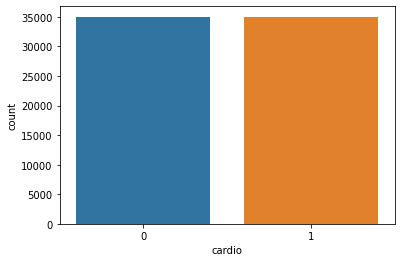

In [ ]:
# Cria um gráfico de barras da variável Target
#O countplot é um gráfico para contar a quantidade de registros agrupados por 
#categoria. Vamos verificar a quantidade de pessoas com doença cardiovascular
#no dataset 1(verd) 0 (false).
ax = sns.countplot(health_data['cardio'])

In [ ]:
#verifica estatistica apenas da coluna desejada por parâmetro
health_data['age'].describe()


count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64

In [ ]:
#O boxplot pode ser utilizado para se estudar várias características do conjunto
#de dados. Por exemplo, para determinar a simetria dos dados basta observar se a
# média é igual (ou próxima) à mediana, pois, nesse caso, os dados são simétricos.

fig = px.box(health_data, y="age")
fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



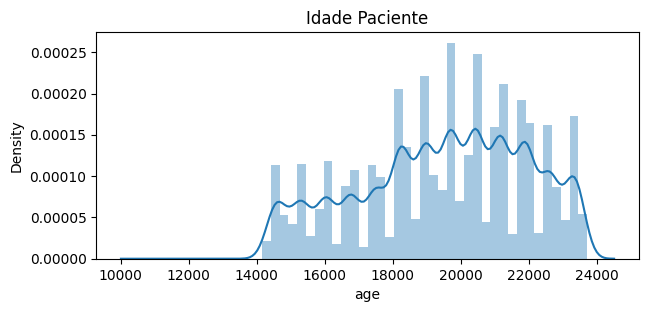

In [ ]:

#O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar 
#a distribuição e valores discrepantes dos dados.
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(health_data['age']).set_title('Idade Paciente')
plt.show()

In [ ]:
# A função retorna a curtose de um conjunto de dados fornecido. A curtose mede o
#pico ou nivelamento de uma distribuição, em comparação com a distribuição normal.
# Um valor de curtose positivo indica uma distribuição relativamente pontiaguda 
#e um valor de curtose negativo indica uma distribuição relativamente plana.
health_data['age'].kurt()


-0.8234468444820653

In [ ]:
#função Pandas retorna inclinação imparcial sobre o eixo solicitado Normalizado 
#por N-1. A assimetria é uma medida da assimetria da distribuição de probabilidade
#de uma variável aleatória de valor real em relação à sua média.
health_data['age'].skew()


-0.3070553957245462

In [ ]:
#verifica estatistica apenas da coluna desejada por parâmetro
health_data['gender'].describe()

count    70000.000000
mean         1.349571
std          0.476838
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: gender, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



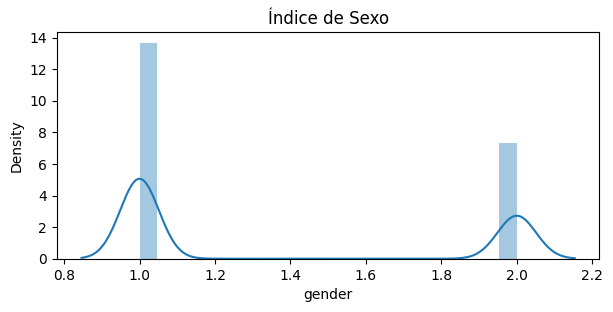

In [ ]:
#tipo corda:(tipo de genero) Com esta função você pode transformar qualquer número real em um string. 
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(health_data['gender']).set_title('Índice de Sexo')
plt.show()

In [ ]:
# A função retorna a curtose de um conjunto de dados fornecido. A curtose mede o
#pico ou nivelamento de uma distribuição, em comparação com a distribuição normal.
# Um valor de curtose positivo indica uma distribuição relativamente pontiaguda 
#e um valor de curtose negativo indica uma distribuição relativamente plana.
health_data['gender'].kurt()


-1.6019351834024333

In [ ]:
#função Pandas retorna inclinação imparcial sobre o eixo solicitado Normalizado 
#por N-1. A assimetria é uma medida da assimetria da distribuição de probabilidade
#de uma variável aleatória de valor real em relação à sua média.
health_data['gender'].skew()

0.6309600518183324

In [ ]:
#verifica estatistica apenas da coluna desejada por parâmetro
health_data['gender'].describe()

count    70000.000000
mean         1.349571
std          0.476838
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: gender, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



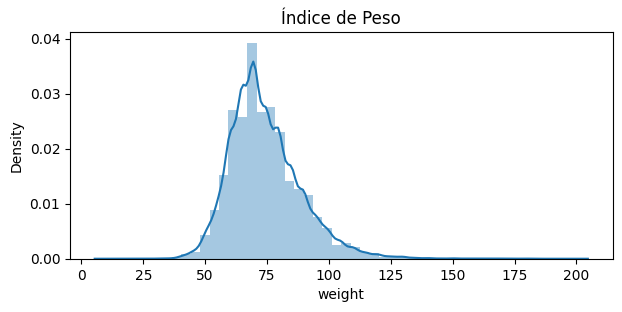

In [ ]:
#tipo corda:(tipo de genero) Com esta função você pode transformar qualquer número real em um string. 
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(health_data['weight']).set_title('Índice de Peso')
plt.show()

In [ ]:
# A função retorna a curtose de um conjunto de dados fornecido. A curtose mede o
#pico ou nivelamento de uma distribuição, em comparação com a distribuição normal.
# Um valor de curtose positivo indica uma distribuição relativamente pontiaguda 
#e um valor de curtose negativo indica uma distribuição relativamente plana.
health_data['weight'].kurt()

2.5868254500056223

In [ ]:
#função Pandas retorna inclinação imparcial sobre o eixo solicitado Normalizado 
#por N-1. A assimetria é uma medida da assimetria da distribuição de probabilidade
#de uma variável aleatória de valor real em relação à sua média.
health_data['weight'].skew()

1.0120701082089065

In [ ]:
#verifica estatistica apenas da coluna desejada por parâmetro
health_data['weight'].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

Kurtosis:  0.02769682496639625


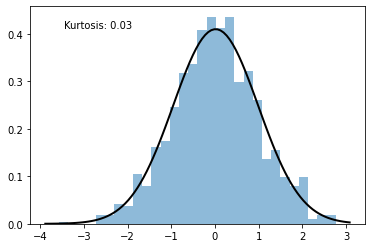

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis

# Gerando uma distribuição aleatória com kurtosis negativo
np.random.seed(1234)
X = np.random.normal(size=1000)
X[0:5] # Visualizando as primeiras 5 amostras

# Calculando a kurtosis da distribuição
kurt = kurtosis(X)
print("Kurtosis: ", kurt)

# Criando um histograma da distribuição
plt.hist(X, bins=30, density=True, alpha=0.5)

# Adicionando uma curva de distribuição normal com média e desvio padrão da amostra
mu, std = norm.fit(X)
Xmin, Xmax = plt.xlim()
X_axis = np.linspace(Xmin, Xmax, 100)
p = norm.pdf(X_axis, mu, std)
plt.plot(X_axis, p, 'k', linewidth=2)

# Adicionando texto para mostrar a kurtosis na figura
plt.text(0.1, 0.9, f"Kurtosis: {kurt:.2f}", transform=plt.gca().transAxes)

plt.show()

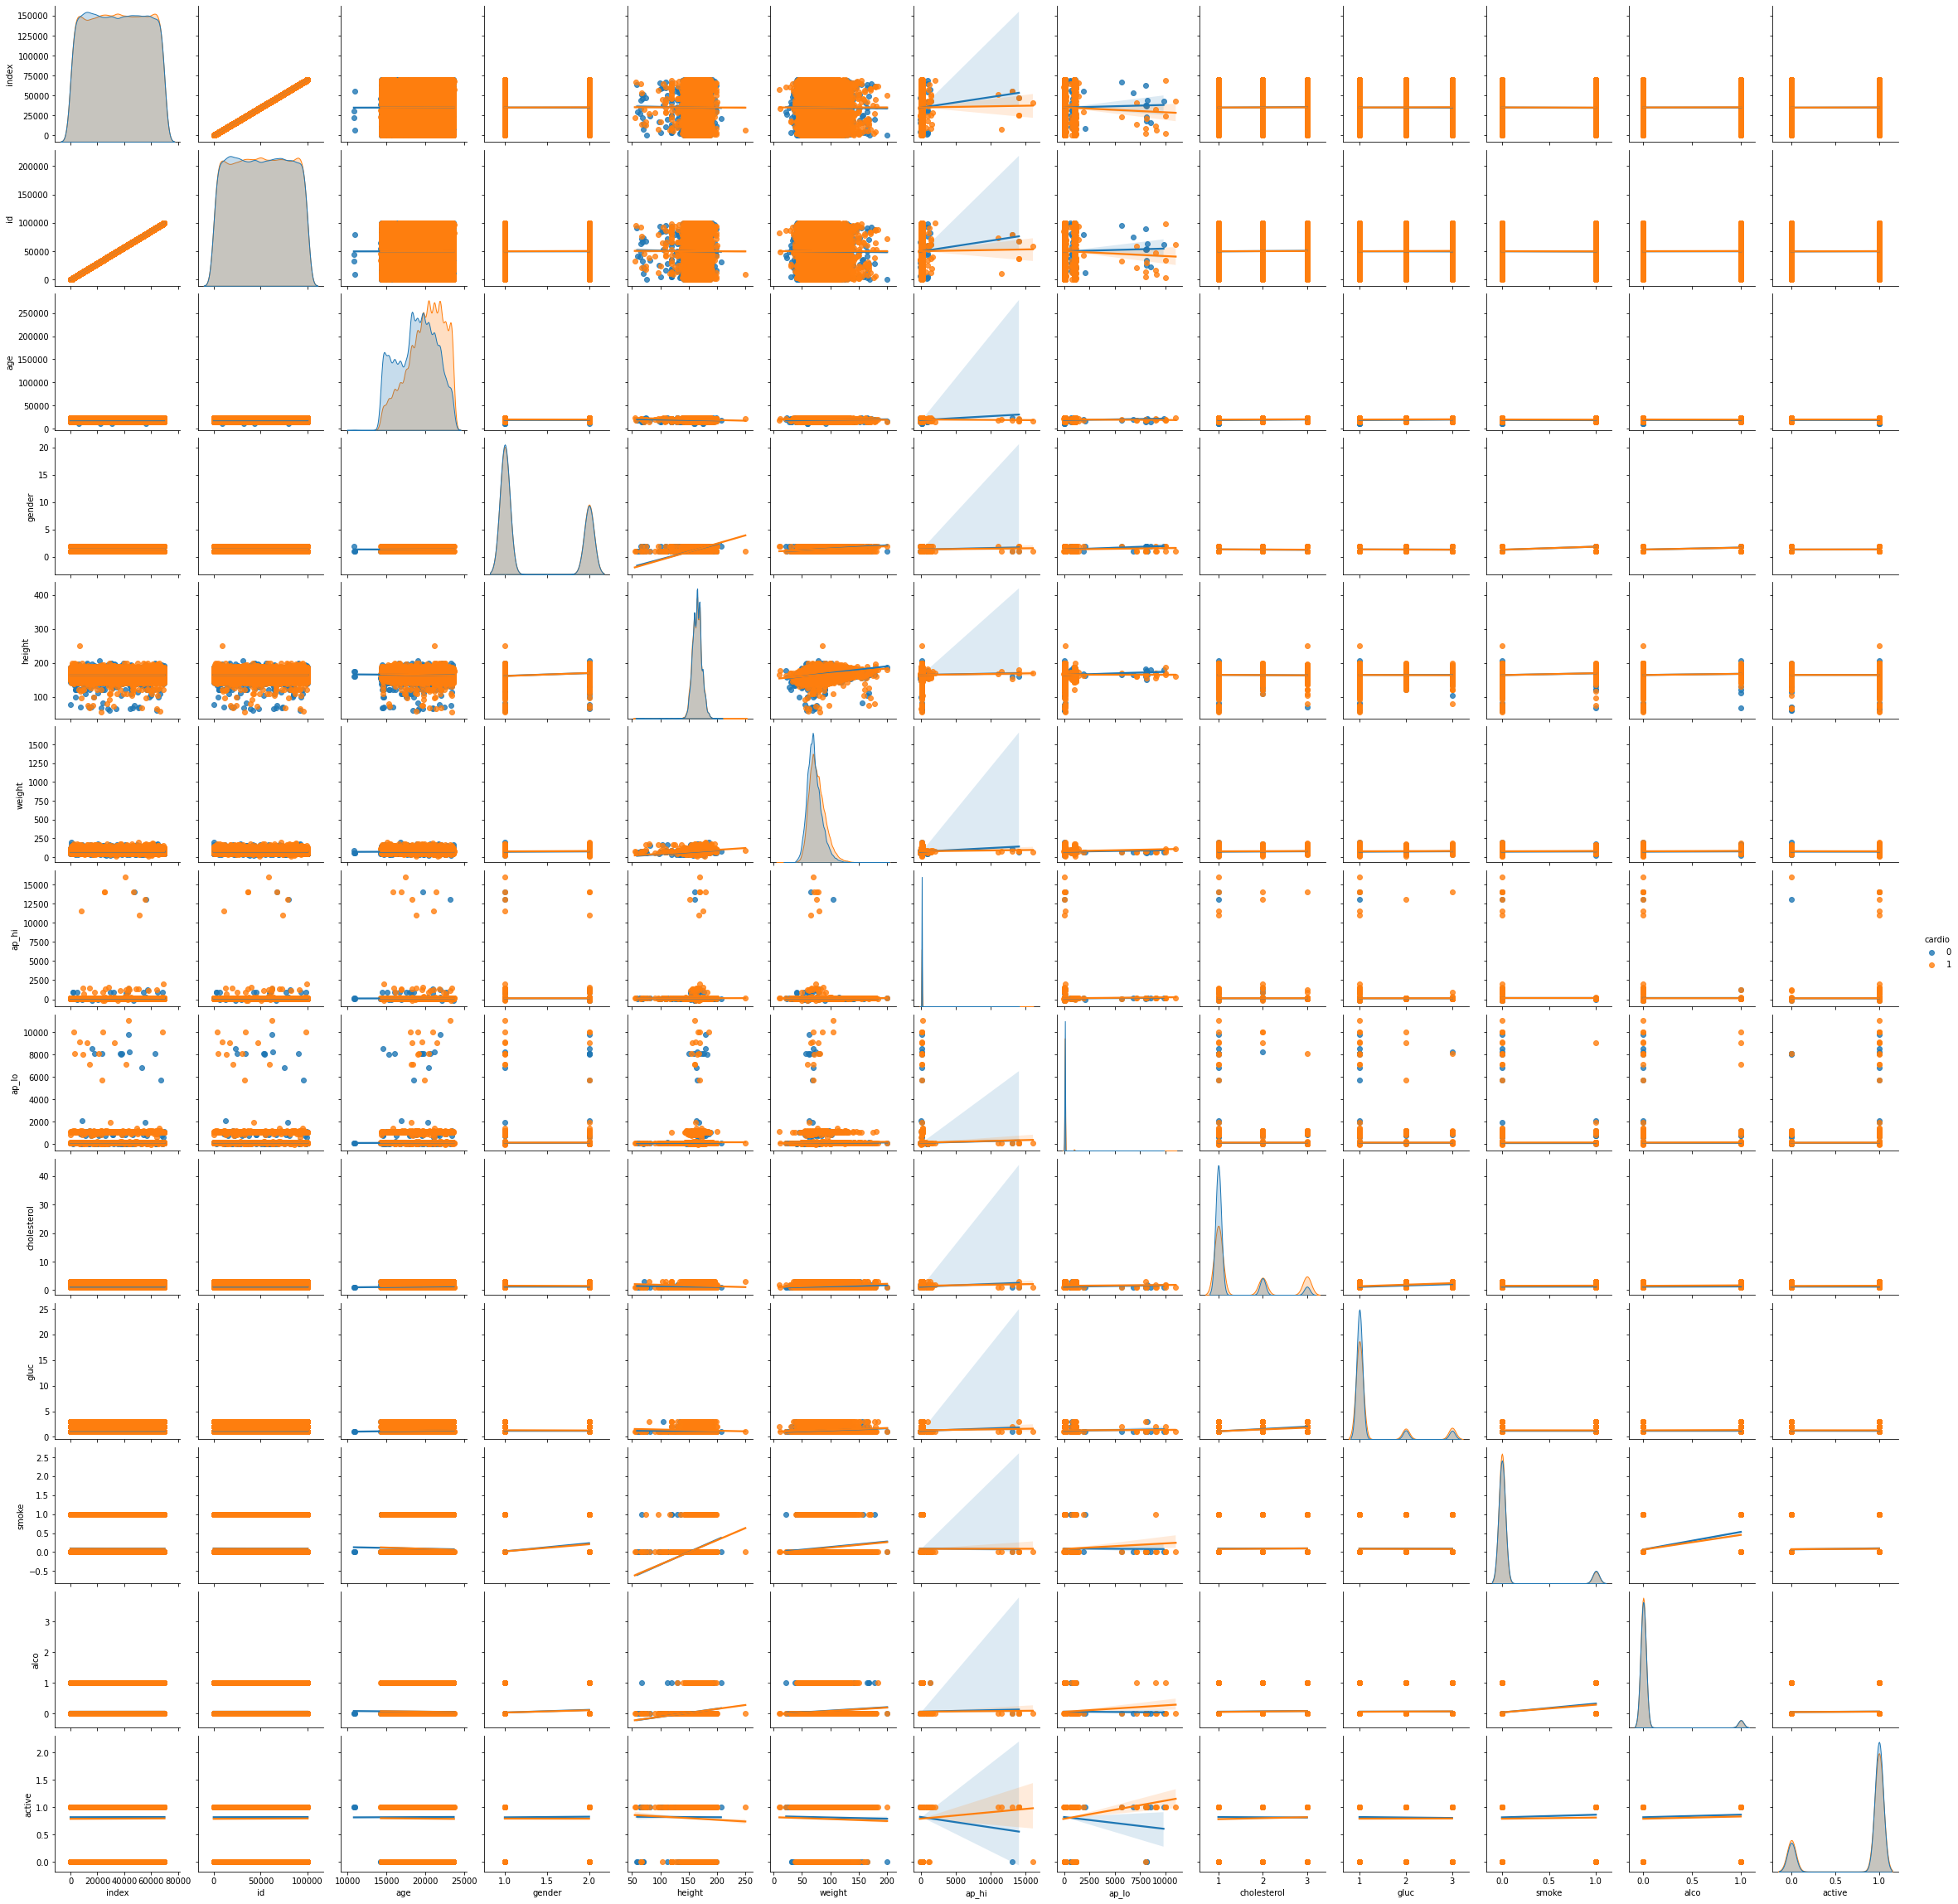

In [ ]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
# o hue é o meu target
# observar analisando linha e coluna dos gráficos, azul = 0 laranja = 1
ax = sns.pairplot(health_data, hue='cardio', kind="reg") # kind=reg é a reta de regressão

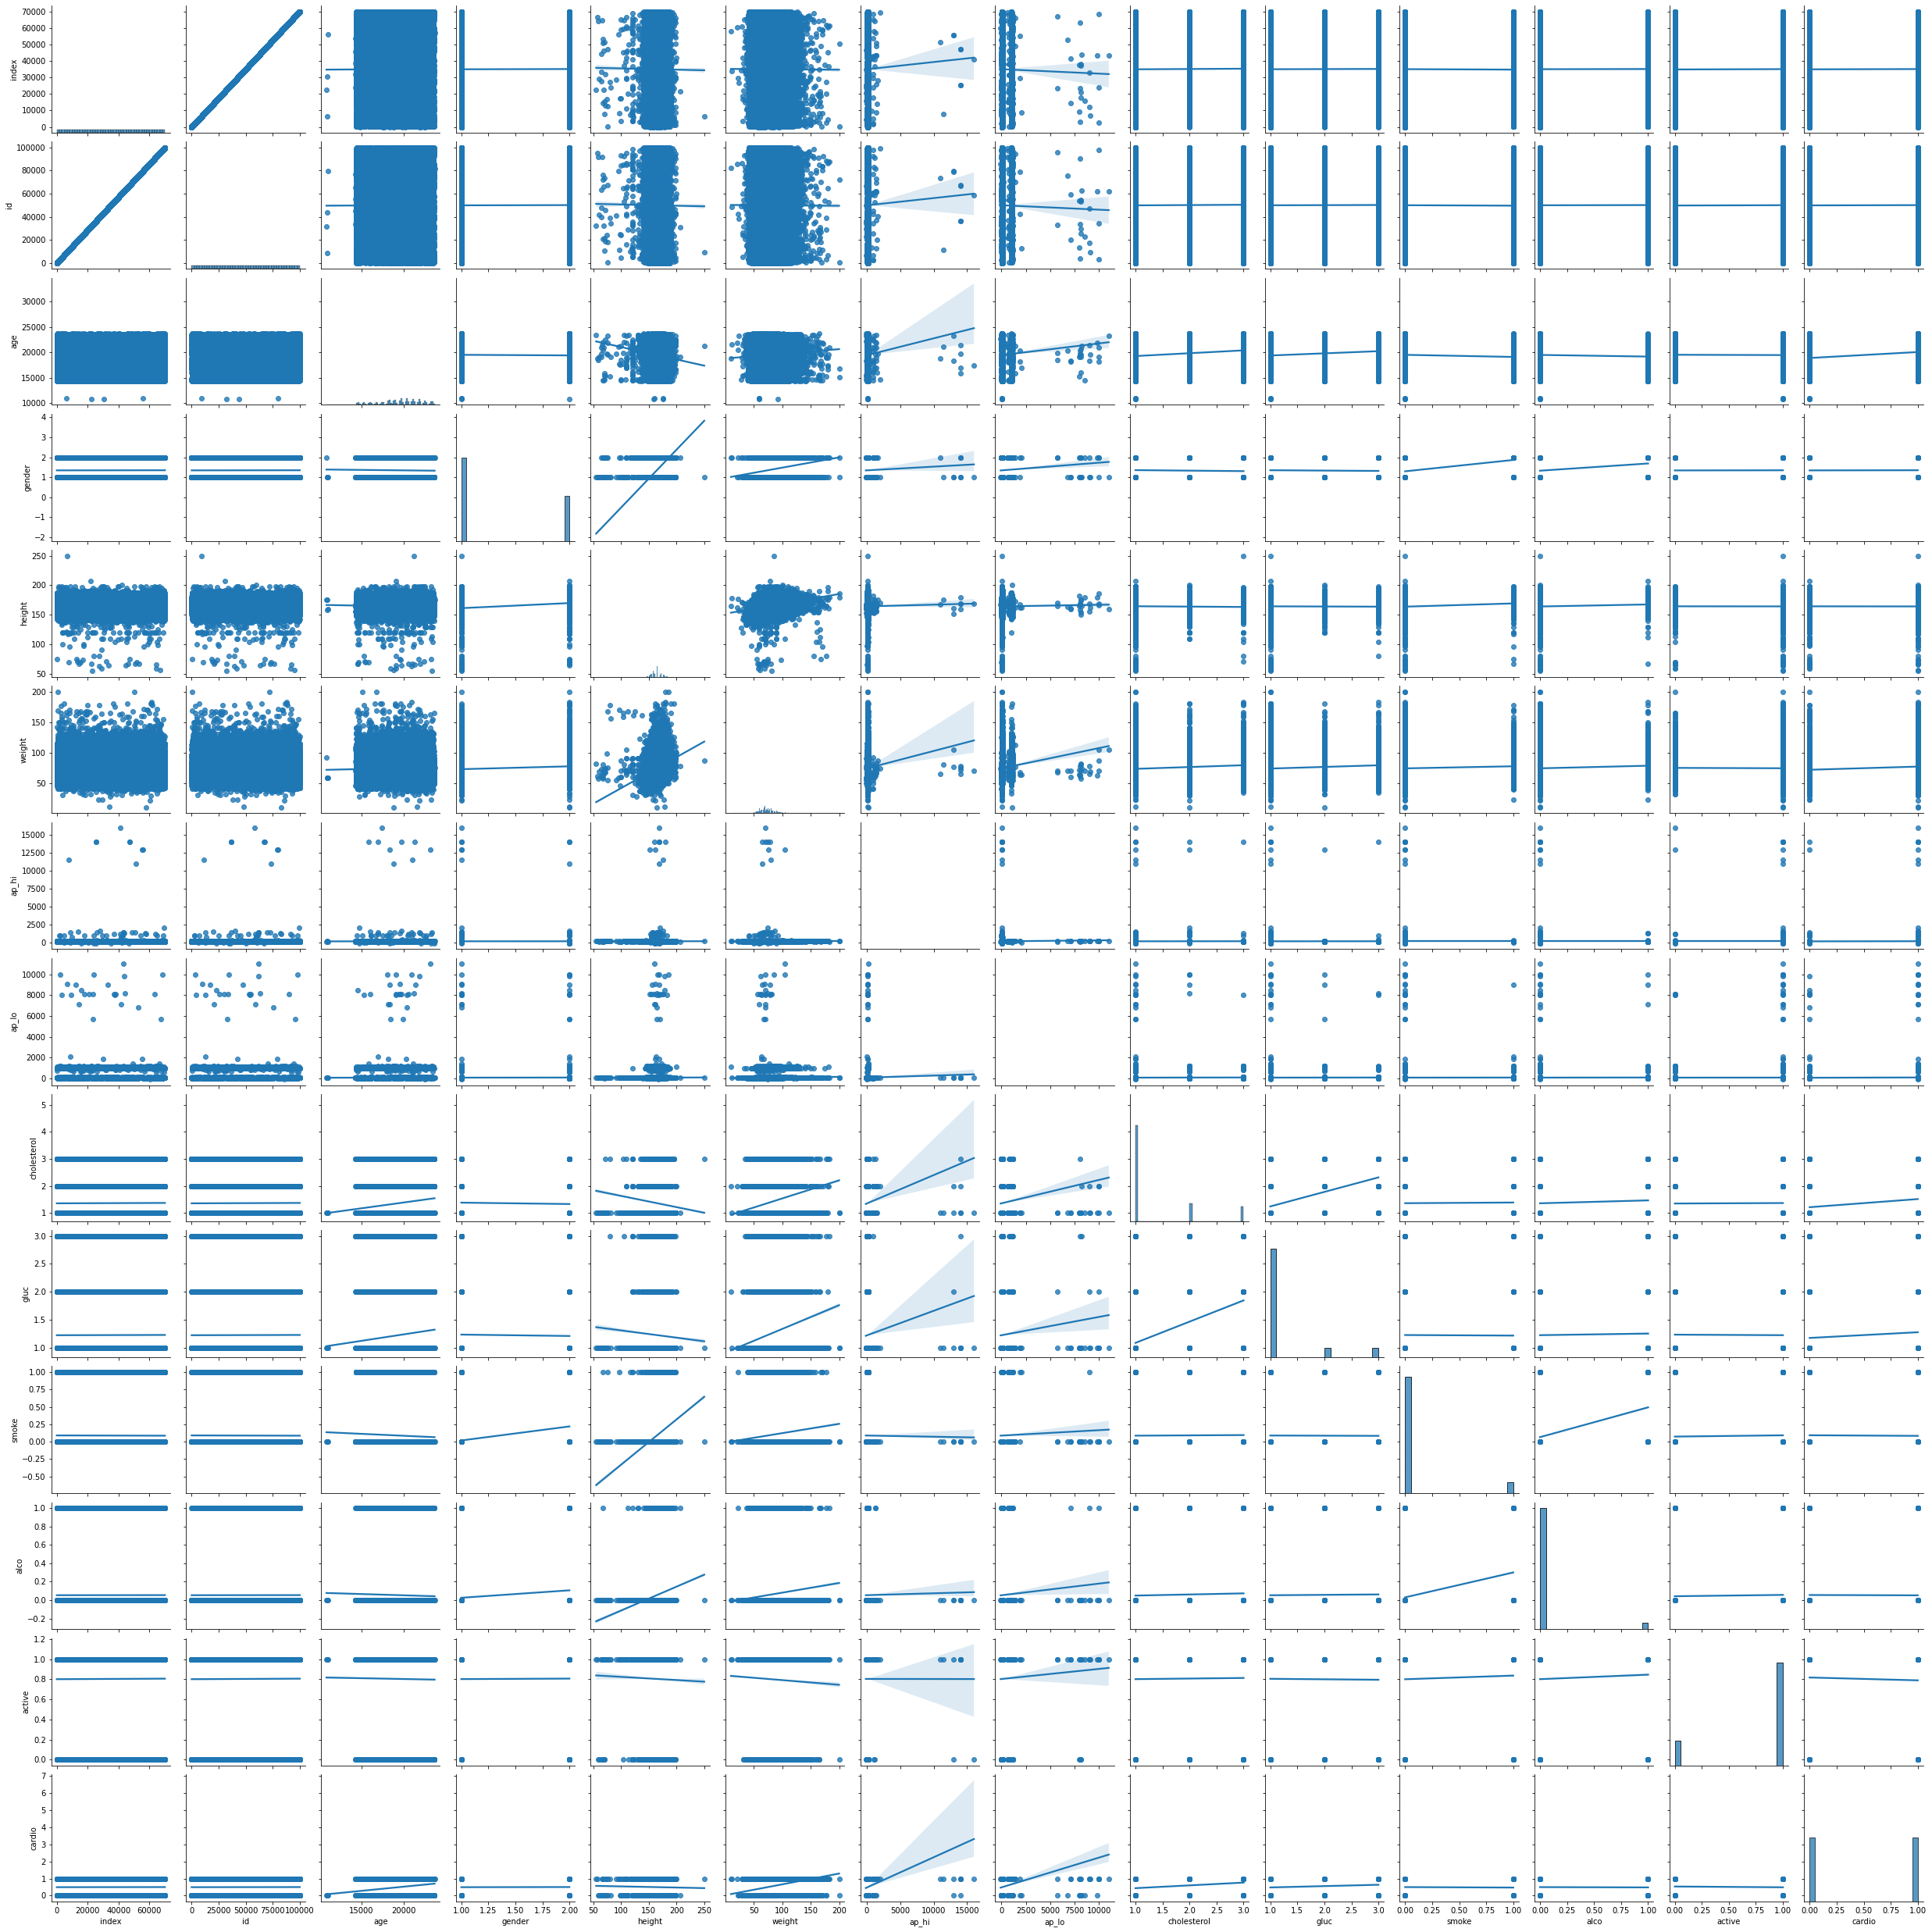

In [ ]:
# Criação do Gráfico de dispersão sem agregar pelo TARGET
ax = sns.pairplot(health_data,kind="reg")

#3° Pré-Processamento dos Dados

In [ ]:

#Eliminar a coluna de identificação, pois ela não é variável explicativa, é somente a identificação do cliente7
health_data.drop(columns='id', axis = 1, inplace=True)

In [ ]:
#Eliminar a coluna de index
health_data.drop(columns='index', axis = 1, inplace=True)

In [ ]:
#Verifica as dimensões do dataset (antes de vírgula são linhas , depois da vírgula são colunas) 
health_data.shape

(69976, 12)

In [ ]:
#Verificando dados duplicados
health_data[health_data.duplicated(keep=False)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [ ]:
#Remove os duplicados
health_data.drop_duplicates(keep='first', inplace=True)

#depois verificar novamente

In [ ]:
#Verifica as dimensões do dataset (antes de vírgula são linhas , depois da vírgula são colunas) 
health_data.shape

(69976, 12)

#4° Construindo a Máquina Preditiva


treinando o modelo

desta forma, é importante treinar o modelo com dados nunca vistos. Treino o modelo em um conjunto de dados em algumas linhas e prevejo em outras linhas,

é idéia do Ciclo de Validação e para isso vamos simular a vidação com uma função do sklearn: train_test_split

a função separa aleatoriamente 75% das linhas para treino e 25% para prever




In [ ]:
y = health_data.cardio

#features =['age',	'gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc',	'smoke',	'alco',	'active']
X = health_data[['age',	'gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc',	'smoke',	'alco',	'active']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_auc_score
# Dividido em dados de validação e treinamento
#random_state é aleatóriamente (vai meio que ser sorteado, e ele te dará a mesma divisão. 
#Apesar de aleatório é reprodutivel), passo as features(x) e alvo (y)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

#defino novamente o modelo
health_model = DecisionTreeRegressor()
# Fit Model, treinar. Agora em vez de ser o fit no X inteiro , será no train_X, que é uma parte dos dados
health_model.fit(train_X, train_y)



# PREVISÃO: Na outra parte dos dados que o modelo nunca viu
val_predictions = health_model.predict(val_X)



In [ ]:
print(y)

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 69976, dtype: int64


In [ ]:
#meu X originalmente tem 70 mil linhas e 10 coluns
X.shape 

(69976, 11)

75% treino, 25% Validação

In [ ]:
#meus dados de treino tem 52500 linhas e os de previsao 17500
train_X.shape, val_X.shape

((52482, 11), (17494, 11))

Especificar e treinar o modelo, novamente

In [ ]:
#random_state é aleatóriamente (vai meio que ser sorteado, e ele te dará a mesma divisão. 
#Apesar de aleatório é reprodutivel), passo as features(x) e alvo (y)


health_model = DecisionTreeRegressor(random_state=0)

#fit

health_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=0)

Previsões para os dados de validação

In [ ]:
#usando os dados novos de validação
val_predictions = health_model.predict(val_X)
print("\n---------------------------\n")
print("Valores Reais com dados de teste:\n",val_y)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",val_predictions)



---------------------------

Valores Reais com dados de teste:
 25521    0
34513    0
69595    0
56818    0
47712    0
        ..
63341    0
16409    0
52455    0
4938     1
51066    1
Name: cardio, Length: 17494, dtype: int64

---------------------------

Valores Preditos com a Máquina Preditiva com dados de Teste :
 [0. 0. 0. ... 0. 0. 1.]


In [ ]:
#seleciono as 10 primeiras previsões
print("Previsões", val_predictions[:10])
print("Target   ", val_y[:10].values)




Previsões [0. 0. 0. 1. 1. 0. 1. 0. 0. 1.]
Target    [0 0 0 0 0 0 0 1 0 1]


no código acima acertei algumas, errei outras. Mas vale ressaltar,
não comparar os erros em dados de treino. Por isso agora ocorreram mais erros, pois usei dados que o modelo nao conhecia (75% treino, 25% previsão) .

#5° Avaliação do modelo


Acurácia


In [ ]:
#Avaliar a precisão do modelo:
#faz a previsao baseado no codigo de previsao la acima:
#usando os dados novos de validação
#val_predictions = health_model.predict(val_X) 
accuracy = accuracy_score(val_y, [round(prediction) for prediction in val_predictions])
auc_roc = roc_auc_score(val_y, val_predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('AUC-ROC: %.2f%%' % (auc_roc * 100.0))

Accuracy: 63.17%
AUC-ROC: 63.17%


Matriz de Confusão

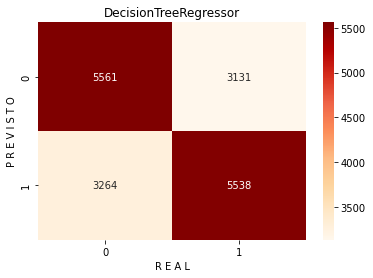

In [ ]:
from sklearn.metrics import (confusion_matrix)
sns.heatmap(confusion_matrix(val_y,val_predictions), cmap='OrRd', annot=True, fmt='2.0f')

plt.title('DecisionTreeRegressor')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
from sklearn.metrics import (cohen_kappa_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)
acuracia = accuracy_score(val_y,val_predictions)
precisao = precision_score(val_y,val_predictions)
recall = recall_score(val_y,val_predictions)
f1Score = f1_score(val_y,val_predictions)
xgb_curva_roc = roc_auc_score(val_y,val_predictions)
kappa = cohen_kappa_score(val_y,val_predictions)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(xgb_curva_roc,2)}')

Acurácia:0.63
Precisão:0.64
Recall ou Sensibilidade:0.63
F1-Score:0.63
Kappa:0.27
Curva ROC:0.63



X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size = 0.3,random_state = 42) dele

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0) eu


